### The file is code for various monte carlo simulations:
    1. Bivariate-Normally distributed random vectors
    2. Geometric Brownian Motion, call price
    3. Euler’s discretization

In [1]:
import numpy as np
from numpy import sqrt, log, sin, cos, exp, pi, mean, var
from scipy.stats import norm
import matplotlib.pyplot as plt

rho =  -0.7215218883385013
Question 2: Value of E =  1.5769445297688265 

Ea1 =  4.974143153376786 	
var =  50.90141948774794 

Ea2 = 1.0017404016972058 	
var =  0.1287217023293299 

Ea3 =  1.0396881017099597 	
var =  11.206569108851108 

Ea4 =  1.1920795065775185 	
var =  327.5953947477869 

Eb1 =  4.966779966421888 	
var =  40.864171351454665 

Eb2 =  1.0016167780368381 	
var =  0.10353488135205106 

Eb3 =  1.0072987772529827 	
var =  8.390243764827943 

Eb4 =  0.9714850130680581 	
var =  211.72217362754847 

call price using Monte-Carlo =  18.31758731221175 

call price using Black Scholes =  18.28376570485581 

call price using antithetic variates - var reduction technique  18.34725710304371
var monte carlo  0.7896512592447794


(3.1417914776113167, 3.135854404033523)

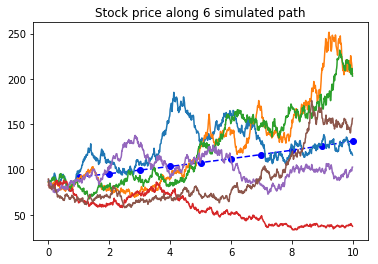

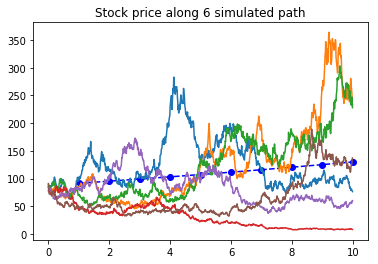

In [2]:

# Generates Random number U[0, 1]
# @param n = number of random number to be generated
# @param seed = starting number
# @return vector of random numbers
def genRandUnif(n, seed=100, LGMm=2**31-1, LGMa=7**5):
    x=np.array([seed], dtype=np.float64)
    u=np.array([], dtype=np.float64)
    for i in range(n):
        rand = (LGMa*x[i]) % LGMm
        x = np.append(x, rand)
        u = np.append(u, rand/LGMm)
    return u       
    
# Generates N(0,1) using Box-Muller method
# @param n = number of standard normal random numbers
# @param seed
# @return numpy array of 'n' N(0,1) numbers
def genStandardNorm(n, seed=100):
    rnorm = np.array([])
    rUnif = genRandUnif(n, seed)
    u1 = rUnif[:n//2]
    u2 = rUnif[n//2:]
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    rnorm = np.append(rnorm, z1) 
    rnorm = np.append(rnorm, z2)
    return rnorm

# Generates Bi -variates normal variables 
# and computes the rho
# @param seed 
# @return rho number
# sigma1 and sigma2 are 1    
def genBiNorm(seed, n=1000, a=-0.7):
    z = genStandardNorm(2*n, seed)
    z1 = np.split(z, 2)[0]
    z2 = np.split(z, 2)[1]
    x = 0 + 1*z1 #sigma 1 here and mean =0
    y = 0 + sqrt(1-a**2)*z2 + a*z1 #sigma 1 mean = 0 
    return x, y
    
    

# Question 1
def calCorr(seed=100):  
    x, y = genBiNorm(seed=seed)
    xm = np.mean(x)
    ym = np.mean(y)
    n = 1000
    rho = ((1/(n-1))*np.sum((x-xm)*(y-ym)))/(sqrt( (1/(n-1))*np.sum((x-xm)**2) ) * sqrt( (1/(n-1))*np.sum((y-ym)**2) ))
    print('rho = ', rho)
    return rho

calCorr(seed=20)    
    
# Question 2
def expectedValue_2(seed=100):
    x, y = genBiNorm(seed=seed, n=10**4, a=0.6)
    f = x**3 + sin(y) + (x**2)*y
    # max(0, f)
    f = np.where(f>0, f, 0)
    E = np.mean(f)    
    print('Question 2: Value of E = ', E, '\n')
    return E
    
expectedValue_2(seed=300)

# Question 3
def expectedValue_3(seed=100):
    z = genStandardNorm(n=10**4, seed=seed)
    w5 = sqrt(5)*z
    f1 = w5**2 + sin(w5) 
    Ea1 = mean(f1)
    print('Ea1 = ', Ea1, '\t' )
    print('var = ', var(f1), '\n')
        
    t1 = 0.5
    f2 = exp(t1/2)*cos(sqrt(t1)*z)
    Ea2 = mean(f2)
    print('Ea2 =', Ea2, '\t' )
    print('var = ', var(f2), '\n')
            
    t2 = 3.2
    f3 = exp(t2/2)*cos(sqrt(t2)*z)
    Ea3 = mean(f3)
    print('Ea3 = ', Ea3, '\t' )
    print('var = ', var(f3), '\n')
    
    t3 = 6.5
    f4 = exp(t3/2)*cos(sqrt(t3)*z)
    Ea4 = mean(f4)
    print('Ea4 = ', Ea4, '\t' )
    print('var = ', var(f4), '\n')

    #3.c
    u1, u2 = genBiNorm(seed=seed, n=10000, a=-0.8)
    fu1 = (sqrt(5)*u1)**2 + sin(sqrt(5)*u1)
    fu2 = (sqrt(5)*u2)**2 + sin(sqrt(5)*u2)
    Eb1 = mean((fu1+fu2)/2)
    print('Eb1 = ', Eb1, '\t')
    print('var = ', var((fu1+fu2)/2), '\n')
    
    t = 0.5
    f1 = exp(t/2)*cos(sqrt(t)*u1)
    f2 = exp(t/2)*cos(sqrt(t)*u2)
    Eb2 = mean((f1+f2)/2)
    print('Eb2 = ', Eb2, '\t')
    print('var = ', var((f1+f2)/2), '\n')
    
    t = 3.2
    f1 = exp(t/2)*cos(sqrt(t)*u1)
    f2 = exp(t/2)*cos(sqrt(t)*u2)
    Eb3 = mean((f1+f2)/2)
    print('Eb3 = ', Eb3, '\t')
    print('var = ', var((f1+f2)/2), '\n')
         
    t = 6.5
    f1 = exp(t/2)*cos(sqrt(t)*u1)
    f2 = exp(t/2)*cos(sqrt(t)*u2)
    Eb4 = mean((f1+f2)/2)
    print('Eb4 = ', Eb4, '\t')
    print('var = ', var((f1+f2)/2), '\n')
    
    return Ea1, Ea2, Ea3, Eb1, Eb2, Eb3
    
expectedValue_3(seed=200)
    
# Question 4
def callPrice(seed = 100):
    r = 0.04
    sigma = 0.2
    So = 88
    x = 100
    T = 5
    z = genStandardNorm(n=10**5, seed=seed)
    Wt = sqrt(T)*z
    ST = So*exp(sigma*Wt+(r-sigma**2/2)*T)
    STX = ST - x
    STX = np.where(STX>0, STX, 0)
    call = mean(exp(-r*T)*STX)
    print('call price using Monte-Carlo = ', call, '\n')
    
    #Question 4b - call price Black Scholes
    d1 = (log(So/x) + (r+sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    call_bs = norm.cdf(d1)*So - norm.cdf(d2)*x*exp(-r*T)
    print('call price using Black Scholes = ', call_bs, '\n')
    
    #Question 4a, 4b using variance reduction technique
    u1 = genStandardNorm(n=10**5, seed=seed)
    u2 = -u1
    ST1 = So*exp(sigma*(sqrt(T)*u1)+(r-sigma**2/2)*T)
    ST2 = So*exp(sigma*(sqrt(T)*u2)+(r-sigma**2/2)*T)
    STX1 = ST1 - x
    STX2 = ST2 - x
    STX1 = np.where(STX1>0, STX1, 0)
    STX2 = np.where(STX2>0, STX2, 0)
    
    call_var_reduce = mean( (exp(-r*T)*STX1 + exp(-r*T)*STX2)/2 )
    print('call price using antithetic variates - var reduction technique ', call_var_reduce)
    
    return call, call_bs, call_var_reduce
 
callPrice(seed=200)
   
#Question 5
def simulateStockPrice(seed=100, sigma=0.18):
    r = 0.04
    So = 88
    T = 10
    dt = T/1000
    
    #part a
    z = genStandardNorm(n=1000, seed=seed)
    stockPrice = np.array([])
    for t in range(1, 11):
        St = So*exp(sigma*sqrt(t)*z+(r-sigma**2/2)*t)
        stockPrice = np.append(stockPrice, mean(St))
    
    fig, axe = plt.subplots(1, sharex=True, sharey=True)
    t = np.arange(1, 11)
    axe.plot(t, stockPrice, '--bo')    

    #part b
    z = genStandardNorm(n=6000, seed=seed)
    paths = np.array(np.split(z, 6))
    paths = np.cumsum(paths,axis=1)    
    t = np.arange(0, 10, 1/100)    
    
    #partc
    for i in range(6):
        St = So*exp(sigma*sqrt(dt)*paths[i]+(r-sigma**2/2)*t)
        axe.plot(t, St)
    axe.set_title('Stock price along 6 simulated path')   
    
#Question 5d
simulateStockPrice(seed=200, sigma=0.18)
simulateStockPrice(seed=200, sigma=0.35)

#Question 6
def integral(seed=100):
    
    #6.a
    dx = 1/10000
    x = np.arange(0, 1, dx)
    Ia = sum(4*sqrt(1-x**2)*dx)
    
    #6.b
    u = genRandUnif(n=10000, seed=seed)
    f = 4*sqrt(1-u**2)
    Ib = mean(f)
    print('var monte carlo ', var(f))
    
    #6.c Importance Sampling
    n_test = 1000
    a = np.arange(0,1,1/n_test)
    Y = np.random.uniform(0,1,10000)
    var_test = []
    
    for i in range(n_test):
        var_test.append(np.var(4*np.sqrt(1-Y**2)/(((1-a[i]/3)**(-1))*(1-a[i]*Y**2))))
    
    optimal_a = a[np.argmin(var_test)]
    fun2 = (4*np.sqrt(1-Y**2)/(((1-optimal_a/3)**(-1))*(1-optimal_a*Y**2)))
    np.mean(fun2)
       
    return Ia, Ib

integral(10)   